## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import bostonDataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

## Parameters 

In [3]:
variance = 1

In [4]:
# Parameters
variance = 0.01


## Dataset 


In [5]:
#Parameters 
n_features = 13
n_samples= 506
n_target = 1 

In [6]:
X,Y = bostonDataset.boston_data()

         X1        X2        X3        X4        X5        X6        X7  \
0 -0.419782  0.284830 -1.287909 -0.272599 -0.144217  0.413672 -0.120013   
1 -0.417339 -0.487722 -0.593381 -0.272599 -0.740262  0.194274  0.367166   
2 -0.417342 -0.487722 -0.593381 -0.272599 -0.740262  1.282714 -0.265812   
3 -0.416750 -0.487722 -1.306878 -0.272599 -0.835284  1.016303 -0.809889   
4 -0.412482 -0.487722 -1.306878 -0.272599 -0.835284  1.228577 -0.511180   

         X8        X9       X10       X11       X12       X13         Y  
0  0.140214 -0.982843 -0.666608 -1.459000  0.441052 -1.075562  0.159686  
1  0.557160 -0.867883 -0.987329 -0.303094  0.441052 -0.492439 -0.101524  
2  0.557160 -0.867883 -0.987329 -0.303094  0.396427 -1.208727  1.324247  
3  1.077737 -0.752922 -1.106115  0.113032  0.416163 -1.361517  1.182758  
4  1.077737 -0.752922 -1.106115  0.113032  0.441052 -1.026501  1.487503  


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 64
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.033215
0:	learn: 1.0009583	total: 58.3ms	remaining: 58.3s
1:	learn: 0.9805952	total: 59.4ms	remaining: 29.6s
2:	learn: 0.9614969	total: 60.4ms	remaining: 20.1s
3:	learn: 0.9442150	total: 61.3ms	remaining: 15.3s
4:	learn: 0.9258754	total: 62.3ms	remaining: 12.4s
5:	learn: 0.9109741	total: 63.3ms	remaining: 10.5s
6:	learn: 0.8948356	total: 64.2ms	remaining: 9.11s
7:	learn: 0.8786300	total: 65.2ms	remaining: 8.08s
8:	learn: 0.8637886	total: 66.1ms	remaining: 7.28s
9:	learn: 0.8477158	total: 67ms	remaining: 6.63s
10:	learn: 0.8309997	total: 67.9ms	remaining: 6.1s
11:	learn: 0.8173576	total: 68.6ms	remaining: 5.65s
12:	learn: 0.8023366	total: 69.4ms	remaining: 5.27s
13:	learn: 0.7877128	total: 70.2ms	remaining: 4.94s
14:	learn: 0.7762895	total: 71.1ms	remaining: 4.67s
15:	learn: 0.7639163	total: 71.8ms	remaining: 4.41s
16:	learn: 0.7510280	total: 72.6ms	remaining: 4.2s
17:	learn: 0.7400732	total: 73.4ms	remaining: 4s
18:	learn: 0.7280258	total: 74.2ms	remaining: 3.83s

59:	learn: 0.4423038	total: 109ms	remaining: 1.71s
60:	learn: 0.4378398	total: 110ms	remaining: 1.7s
61:	learn: 0.4330745	total: 111ms	remaining: 1.68s
62:	learn: 0.4300048	total: 112ms	remaining: 1.67s
63:	learn: 0.4264651	total: 113ms	remaining: 1.65s
64:	learn: 0.4227543	total: 114ms	remaining: 1.64s
65:	learn: 0.4179240	total: 116ms	remaining: 1.64s
66:	learn: 0.4139864	total: 116ms	remaining: 1.62s
67:	learn: 0.4114841	total: 117ms	remaining: 1.6s
68:	learn: 0.4081288	total: 118ms	remaining: 1.59s
69:	learn: 0.4044178	total: 119ms	remaining: 1.57s
70:	learn: 0.4007319	total: 119ms	remaining: 1.56s
71:	learn: 0.3983077	total: 120ms	remaining: 1.55s
72:	learn: 0.3951797	total: 121ms	remaining: 1.54s
73:	learn: 0.3916209	total: 122ms	remaining: 1.52s
74:	learn: 0.3886197	total: 123ms	remaining: 1.51s
75:	learn: 0.3851451	total: 124ms	remaining: 1.51s
76:	learn: 0.3826048	total: 125ms	remaining: 1.5s
77:	learn: 0.3801301	total: 126ms	remaining: 1.49s
78:	learn: 0.3780983	total: 127ms	

154:	learn: 0.2621478	total: 192ms	remaining: 1.05s
155:	learn: 0.2613554	total: 193ms	remaining: 1.04s
156:	learn: 0.2603088	total: 194ms	remaining: 1.04s
157:	learn: 0.2593478	total: 195ms	remaining: 1.04s
158:	learn: 0.2585053	total: 196ms	remaining: 1.03s
159:	learn: 0.2575493	total: 196ms	remaining: 1.03s
160:	learn: 0.2567676	total: 197ms	remaining: 1.03s
161:	learn: 0.2556122	total: 198ms	remaining: 1.02s
162:	learn: 0.2551336	total: 199ms	remaining: 1.02s
163:	learn: 0.2544170	total: 200ms	remaining: 1.02s
164:	learn: 0.2536168	total: 200ms	remaining: 1.01s
165:	learn: 0.2527050	total: 201ms	remaining: 1.01s
166:	learn: 0.2522744	total: 202ms	remaining: 1.01s
167:	learn: 0.2508612	total: 203ms	remaining: 1s
168:	learn: 0.2501133	total: 204ms	remaining: 1s
169:	learn: 0.2495768	total: 205ms	remaining: 998ms
170:	learn: 0.2487230	total: 205ms	remaining: 995ms
171:	learn: 0.2479965	total: 206ms	remaining: 993ms
172:	learn: 0.2471687	total: 207ms	remaining: 990ms
173:	learn: 0.2466

262:	learn: 0.1962028	total: 298ms	remaining: 836ms
263:	learn: 0.1959724	total: 300ms	remaining: 835ms
264:	learn: 0.1956062	total: 301ms	remaining: 834ms
265:	learn: 0.1951501	total: 301ms	remaining: 832ms
266:	learn: 0.1946756	total: 302ms	remaining: 830ms
267:	learn: 0.1941793	total: 303ms	remaining: 828ms
268:	learn: 0.1939731	total: 304ms	remaining: 826ms
269:	learn: 0.1936580	total: 305ms	remaining: 824ms
270:	learn: 0.1931357	total: 306ms	remaining: 822ms
271:	learn: 0.1926421	total: 307ms	remaining: 820ms
272:	learn: 0.1922271	total: 307ms	remaining: 819ms
273:	learn: 0.1917661	total: 308ms	remaining: 817ms
274:	learn: 0.1913457	total: 309ms	remaining: 816ms
275:	learn: 0.1908435	total: 310ms	remaining: 814ms
276:	learn: 0.1905410	total: 311ms	remaining: 812ms
277:	learn: 0.1902005	total: 312ms	remaining: 810ms
278:	learn: 0.1899254	total: 313ms	remaining: 808ms
279:	learn: 0.1896858	total: 314ms	remaining: 806ms
280:	learn: 0.1888917	total: 314ms	remaining: 804ms
281:	learn: 

354:	learn: 0.1616323	total: 381ms	remaining: 691ms
355:	learn: 0.1613022	total: 381ms	remaining: 690ms
356:	learn: 0.1610572	total: 382ms	remaining: 689ms
357:	learn: 0.1606669	total: 383ms	remaining: 687ms
358:	learn: 0.1603635	total: 384ms	remaining: 686ms
359:	learn: 0.1602199	total: 385ms	remaining: 685ms
360:	learn: 0.1599726	total: 386ms	remaining: 683ms
361:	learn: 0.1598200	total: 387ms	remaining: 682ms
362:	learn: 0.1595749	total: 388ms	remaining: 680ms
363:	learn: 0.1594217	total: 388ms	remaining: 679ms
364:	learn: 0.1592604	total: 389ms	remaining: 677ms
365:	learn: 0.1590804	total: 390ms	remaining: 676ms
366:	learn: 0.1587376	total: 391ms	remaining: 674ms
367:	learn: 0.1586219	total: 392ms	remaining: 673ms
368:	learn: 0.1581259	total: 393ms	remaining: 671ms
369:	learn: 0.1577050	total: 393ms	remaining: 670ms
370:	learn: 0.1572379	total: 394ms	remaining: 669ms
371:	learn: 0.1570014	total: 395ms	remaining: 667ms
372:	learn: 0.1565333	total: 396ms	remaining: 666ms
373:	learn: 

481:	learn: 0.1287199	total: 488ms	remaining: 525ms
482:	learn: 0.1285208	total: 489ms	remaining: 524ms
483:	learn: 0.1283196	total: 490ms	remaining: 523ms
484:	learn: 0.1280838	total: 491ms	remaining: 522ms
485:	learn: 0.1278403	total: 492ms	remaining: 520ms
486:	learn: 0.1275994	total: 493ms	remaining: 519ms
487:	learn: 0.1272609	total: 494ms	remaining: 518ms
488:	learn: 0.1270834	total: 494ms	remaining: 517ms
489:	learn: 0.1269714	total: 495ms	remaining: 515ms
490:	learn: 0.1266456	total: 496ms	remaining: 514ms
491:	learn: 0.1264443	total: 497ms	remaining: 513ms
492:	learn: 0.1262964	total: 497ms	remaining: 512ms
493:	learn: 0.1261886	total: 498ms	remaining: 510ms
494:	learn: 0.1259706	total: 499ms	remaining: 509ms
495:	learn: 0.1258610	total: 500ms	remaining: 508ms
496:	learn: 0.1256634	total: 501ms	remaining: 507ms
497:	learn: 0.1254174	total: 502ms	remaining: 506ms
498:	learn: 0.1252984	total: 502ms	remaining: 504ms
499:	learn: 0.1250214	total: 503ms	remaining: 503ms
500:	learn: 

578:	learn: 0.1096775	total: 571ms	remaining: 415ms
579:	learn: 0.1095935	total: 572ms	remaining: 414ms
580:	learn: 0.1093755	total: 573ms	remaining: 413ms
581:	learn: 0.1092137	total: 573ms	remaining: 412ms
582:	learn: 0.1090063	total: 575ms	remaining: 411ms
583:	learn: 0.1089816	total: 576ms	remaining: 410ms
584:	learn: 0.1087941	total: 577ms	remaining: 409ms
585:	learn: 0.1085901	total: 577ms	remaining: 408ms
586:	learn: 0.1084492	total: 578ms	remaining: 407ms
587:	learn: 0.1082622	total: 579ms	remaining: 406ms
588:	learn: 0.1081204	total: 580ms	remaining: 404ms
589:	learn: 0.1080820	total: 580ms	remaining: 403ms
590:	learn: 0.1078430	total: 581ms	remaining: 402ms
591:	learn: 0.1077577	total: 582ms	remaining: 401ms
592:	learn: 0.1075223	total: 583ms	remaining: 400ms
593:	learn: 0.1073862	total: 583ms	remaining: 399ms
594:	learn: 0.1071799	total: 584ms	remaining: 398ms
595:	learn: 0.1069526	total: 585ms	remaining: 397ms
596:	learn: 0.1067787	total: 586ms	remaining: 396ms
597:	learn: 

709:	learn: 0.0896205	total: 679ms	remaining: 277ms
710:	learn: 0.0895489	total: 680ms	remaining: 276ms
711:	learn: 0.0894239	total: 681ms	remaining: 275ms
712:	learn: 0.0891460	total: 682ms	remaining: 274ms
713:	learn: 0.0890861	total: 682ms	remaining: 273ms
714:	learn: 0.0889870	total: 683ms	remaining: 272ms
715:	learn: 0.0888187	total: 684ms	remaining: 271ms
716:	learn: 0.0887204	total: 685ms	remaining: 270ms
717:	learn: 0.0885708	total: 686ms	remaining: 269ms
718:	learn: 0.0884581	total: 687ms	remaining: 268ms
719:	learn: 0.0882510	total: 687ms	remaining: 267ms
720:	learn: 0.0881069	total: 688ms	remaining: 266ms
721:	learn: 0.0879390	total: 689ms	remaining: 265ms
722:	learn: 0.0878037	total: 690ms	remaining: 264ms
723:	learn: 0.0876455	total: 691ms	remaining: 263ms
724:	learn: 0.0874775	total: 692ms	remaining: 262ms
725:	learn: 0.0874031	total: 692ms	remaining: 261ms
726:	learn: 0.0872771	total: 693ms	remaining: 260ms
727:	learn: 0.0870940	total: 694ms	remaining: 259ms
728:	learn: 

807:	learn: 0.0775766	total: 761ms	remaining: 181ms
808:	learn: 0.0775125	total: 762ms	remaining: 180ms
809:	learn: 0.0773531	total: 763ms	remaining: 179ms
810:	learn: 0.0772525	total: 764ms	remaining: 178ms
811:	learn: 0.0771299	total: 765ms	remaining: 177ms
812:	learn: 0.0770339	total: 766ms	remaining: 176ms
813:	learn: 0.0768904	total: 766ms	remaining: 175ms
814:	learn: 0.0767894	total: 767ms	remaining: 174ms
815:	learn: 0.0766860	total: 768ms	remaining: 173ms
816:	learn: 0.0765628	total: 769ms	remaining: 172ms
817:	learn: 0.0764659	total: 769ms	remaining: 171ms
818:	learn: 0.0764187	total: 770ms	remaining: 170ms
819:	learn: 0.0763282	total: 771ms	remaining: 169ms
820:	learn: 0.0762021	total: 772ms	remaining: 168ms
821:	learn: 0.0761660	total: 773ms	remaining: 167ms
822:	learn: 0.0760369	total: 773ms	remaining: 166ms
823:	learn: 0.0759062	total: 774ms	remaining: 165ms
824:	learn: 0.0757852	total: 775ms	remaining: 164ms
825:	learn: 0.0756395	total: 776ms	remaining: 163ms
826:	learn: 

940:	learn: 0.0649485	total: 869ms	remaining: 54.5ms
941:	learn: 0.0648752	total: 870ms	remaining: 53.5ms
942:	learn: 0.0647632	total: 870ms	remaining: 52.6ms
943:	learn: 0.0646937	total: 871ms	remaining: 51.7ms
944:	learn: 0.0646172	total: 872ms	remaining: 50.8ms
945:	learn: 0.0645904	total: 873ms	remaining: 49.8ms
946:	learn: 0.0644975	total: 874ms	remaining: 48.9ms
947:	learn: 0.0644780	total: 874ms	remaining: 48ms
948:	learn: 0.0643556	total: 875ms	remaining: 47ms
949:	learn: 0.0642615	total: 876ms	remaining: 46.1ms
950:	learn: 0.0641838	total: 877ms	remaining: 45.2ms
951:	learn: 0.0640991	total: 878ms	remaining: 44.3ms
952:	learn: 0.0639860	total: 879ms	remaining: 43.3ms
953:	learn: 0.0639745	total: 880ms	remaining: 42.4ms
954:	learn: 0.0639170	total: 880ms	remaining: 41.5ms
955:	learn: 0.0638218	total: 881ms	remaining: 40.6ms
956:	learn: 0.0637187	total: 882ms	remaining: 39.6ms
957:	learn: 0.0636895	total: 883ms	remaining: 38.7ms
958:	learn: 0.0635635	total: 884ms	remaining: 37.8

In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape)
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)

mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MAE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MAE",mae)

# ABC GAN Model

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

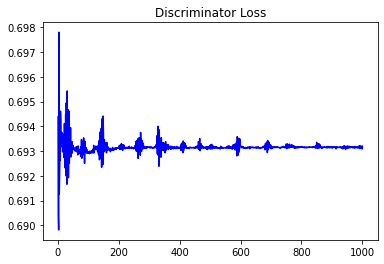

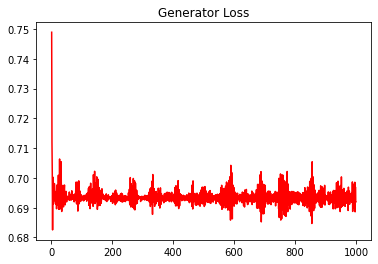

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,0,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,0,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MSE")
print(mean(ABC_GAN1_metrics[0]))

MSE
0.08007524927537366


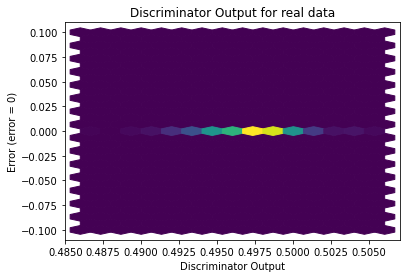

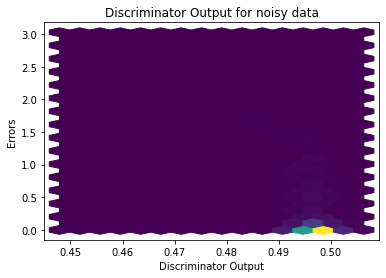

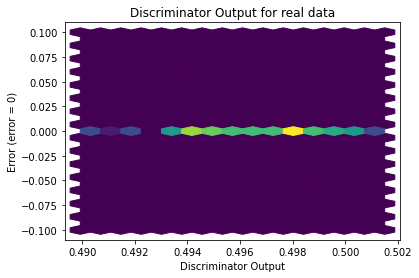

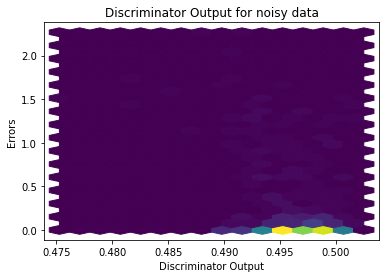

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# ABC - GAN Model with skip connection

In [15]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


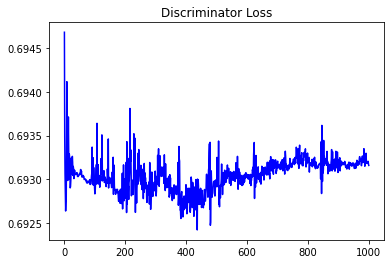

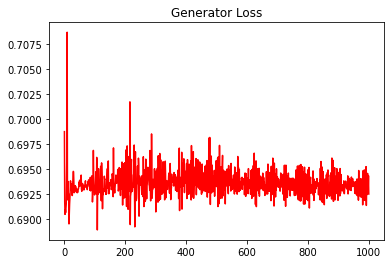

In [16]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,0,device)

In [17]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,0,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.06080614999457448


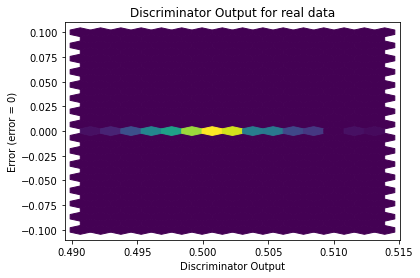

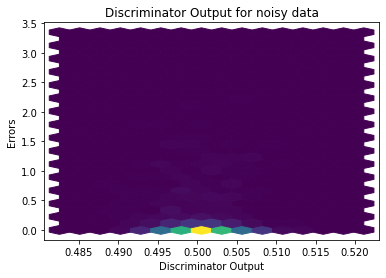

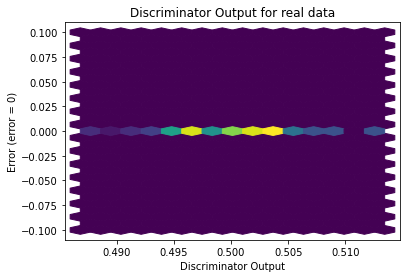

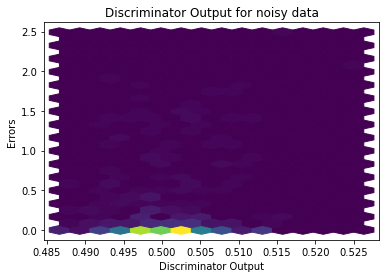

In [18]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [19]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.0914]], requires_grad=True)
